In [1]:
import numpy as np
from typing import List, Optional, Dict, Set, Callable, Any, Literal
from joblib import Memory, Parallel, delayed
import tslearn
import tslearn.metrics
from tslearn.datasets import UCR_UEA_datasets
import torch
from torch import Tensor

from experiments.cross_validation import cv_tslearn, print_cv_results
from experiments.eval_on_test import validate_tslearn, print_test_results
from experiments.utils import join_dicts_from_pickle_paths, save_to_pickle, print_latex_results
from experiments.experiment_code import run_all_kernels

# Cross Validation on Train

In [2]:
cv_results = cv_tslearn(
    dataset_names = [
        'Epilepsy',                    # N_corpus = 34
        # 'EthanolConcentration',        # N_corpus = 65
        # 'FingerMovements',             # N_corpus = 158
        # 'HandMovementDirection',       # N_corpus = 40
        # 'Heartbeat',                   # N_corpus = 102
        # 'LSST',                        # N_corpus = 176
        # 'MotorImagery',                # N_corpus = 139
        # 'NATOPS',                      # N_corpus = 30
        # 'PenDigits',                   # N_corpus = 749
        # 'PEMS-SF',                     # N_corpus = 38
        # 'PhonemeSpectra',              # N_corpus = 85
        # 'RacketSports',                # N_corpus = 38
        # 'SelfRegulationSCP1',          # N_corpus = 134
        ],
    kernel_names = [
            #"flat linear",
            #"flat rbf",
            # "flat poly",
            # "integral rbf",
            # "integral poly",
            # "trunc sig linear",
            # "trunc sig rbf",
            # "pde sig rbf",
            "gak",
            # "reservoir",
        ],
        k_folds=5,
        n_repeats=1,
        verbose=False,
        )

Dataset: Epilepsy
Number of Classes: 4
Dimension of path: 3
Length: 206
Train: 137
Test: N/A


Label for gak:   0%|          | 0/4 [01:21<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
print_cv_results(cv_results)
save_to_pickle(cv_results, "Data/cv_dummy.pkl")

# Validate on Test

In [ ]:
test_results = validate_tslearn(cv_results, verbose=False, device="cuda")
print_test_results(test_results)

# Validate on Test and Save

In [ ]:
for dataset_name, cv_res in cv_results.items():
    if dataset_name == "Epilepsy":
        test_results = validate_tslearn({dataset_name : cv_res}, verbose=True, device="cuda")
        save_to_pickle(test_results, f"Data/results_{dataset_name}.pkl")

# Read CV data from file and print results

In [4]:
# Load the cross validation results
cv_results = join_dicts_from_pickle_paths(
    [
    "Data/cv_Epilepsy.pkl",
    "Data/cv_EthanolConcentration.pkl",
    "Data/cv_FingerMovements.pkl",
    "Data/cv_HandMovementDirection.pkl",
    "Data/cv_Heartbeat.pkl",
    "Data/cv_LSST.pkl",
    "Data/cv_MotorImagery.pkl",
    "Data/cv_NATOPS.pkl",
    "Data/cv_PEMS-SF.pkl",
    # "Data/cv_PhonemeSpectra.pkl",
    "Data/cv_RacketSports.pkl",
    "Data/cv_SelfRegulationSCP1.pkl",
    "Data/cv_SelfRegulationSCP2.pkl",
    ])
print_cv_results(cv_results)

Cross Validation Results
Number of Classes: 4
Dimension of path: 3
Length: 206
Train: 137
Test: N/A

conf_results

flat linear
final_score_avgs 1.7104643075383625
alphas_score_avgs [1.71]
thresh_score_avgs [1.358 1.526 1.674 1.668 1.595 1.526 1.463 1.411 1.381 1.361 1.348 1.338
 1.329 1.322 1.315 1.303 1.29  1.283 1.279 1.273 1.266 1.27  1.27  1.271
 1.256 1.253 1.253 1.26  1.264 1.264 1.264 1.264 1.264 1.264 1.264 1.264
 1.264 1.264 1.264 1.264 1.264 1.264 1.264 1.264 1.264 1.264 1.264 1.264
 1.264 1.264]
EPILEPSY
{'basepoint': 'I_visibility', 'time': '', 'normalize': False, 'threshold': 3, 'alpha': 1e-06, 'CV_time': 108.81816792488098}
RUNNING
{'basepoint': 'T_visibility', 'time': '', 'normalize': False, 'threshold': 3, 'alpha': 1e-06, 'CV_time': 108.81816792488098}
SAWING
{'basepoint': 'I_visibility', 'time': '', 'normalize': False, 'threshold': 3, 'alpha': 1e-06, 'CV_time': 108.81816792488098}
WALKING
{'basepoint': '', 'time': '', 'normalize': False, 'threshold': 5, 'alpha': 1e-06,

In [3]:
test_results = join_dicts_from_pickle_paths([
    "Data/results_Epilepsy.pkl",
    "Data/results_EthanolConcentration.pkl",
    "Data/results_FingerMovements.pkl",
    "Data/results_HandMovementDirection.pkl",
    "Data/results_Heartbeat.pkl",
    "Data/results_LSST.pkl",
    "Data/results_MotorImagery.pkl",
    "Data/results_NATOPS.pkl",
    "Data/results_PEMS-SF.pkl",
    # "Data/results_PhonemeSpectra.pkl",
    "Data/results_RacketSports.pkl",
    "Data/results_SelfRegulationSCP1.pkl",
    "Data/results_SelfRegulationSCP2.pkl",
                                             ])
print_latex_results(test_results, round_digits=2)
print_latex_results(test_results, round_digits=3)

PR LaTeX table:

    \begin{tabular}{lc||ccc|cc|ccc|c|c}
        \toprule
        \multirow{2}{*}{Dataset}   &  \multicolumn{11}{c}{Precision-Recall AUC} \\
        \cline{3-12}
                                & & linear & RBF & poly 
                                & $I_\text{RBF}$ & $I_\text{poly}$ 
                                & $S_\text{lin}$ & $S_\text{RBF}$ & $S^\infty_\text{RBF}$ 
                                & GAK & VRK\\ 
        \hline
        \hline
		\hline
		\multirow{2}{*}{EP}    
		& C & \textbf{.86} & .49 & .77 & .46 & .79 & .74 & .44 & .74 & .56 & .76\\
		& M & .63 & .63 & .60 & .62 & .59 & .76 & \textbf{.78} & .73 & .60 & .68\\
		\hline
		\multirow{2}{*}{EC}    
		& C & .29 & .28 & .33 & .30 & .29 & \textbf{.34} & \textbf{.34} & .33 & .30 & .33\\
		& M & .30 & .30 & .31 & .33 & .33 & \textbf{.35} & .32 & .31 & .31 & .31\\
		\hline
		\multirow{2}{*}{FM}    
		& C & .50 & .50 & \textbf{.61} & .52 & .58 & .50 & .50 & .52 & .54 & .57\\
		& M & \textbf{.56} & .52 & .

## Enumerate all UCR UEA datasets in 'tslearn'

In [ ]:
UCR_UEA_datasets = UCR_UEA_datasets()

for dataset_name in UCR_UEA_datasets.list_multivariate_datasets():
#for dataset_name in _datasets:
    print("Dataset:", dataset_name)
    dataset = UCR_UEA_datasets.load_dataset(dataset_name)
    if dataset[0] is not None:
        X_train, y_train, X_test, y_test = dataset
        num_classes = len(np.unique(y_train))
        N_train, T, d = X_train.shape
        N_test, _, _  = X_test.shape
        
        print("Number of Classes:", num_classes)
        print("Dimension of path:", d)
        print("Length:", T)
        print("Train Size, Test Size", N_train, N_test)
        print()
    else:
        print("No dataset found")
        print()

# Print distribution of CV params

In [6]:
import matplotlib.pyplot as plt

all_datasets = [
    "Epilepsy",
    "EthanolConcentration",
    "FingerMovements",
    "HandMovementDirection",
    "Heartbeat",
    "LSST",
    "MotorImagery",
    "NATOPS",
    "PEMS-SF",
    "PhonemeSpectra",
    "RacketSports",
    "SelfRegulationSCP1",
    "SelfRegulationSCP2",
    ]

all_kernels = [
    "flat linear",
    "flat rbf",
    "flat poly",
    "integral rbf",
    "integral poly",
    "trunc sig linear",
    "trunc sig rbf",
    "pde sig rbf",
    "gak",
    "reservoir",
    ]


def plot_cv_params_single_kernel(
        cv_results:Dict,
        param_name:str = "sigma", 
        kernel_name:str = "flat rbf", 
        datasets:Optional[List[str]] = None, 
        n_bins:int = 30,
    ):
    """
    For each dataset, plot the histogram of the best parameter
    values specified by 'param_name' for the kerenl "kernel_name".
    """
    if datasets is None:
        datasets = list(cv_results.keys())

    l = []
    for dataset_name, results in cv_results.items():
        for anomaly_method in ["conf_results", "mahal_results"]:
            kernelwise_dict = results[anomaly_method]
            for ker, labelwise_dict in kernelwise_dict.items():
                for label, param_dict in labelwise_dict.items():
                    if ker == kernel_name:
                        l.append(param_dict[param_name])
    l = np.array(l)
    l.sort()
    l = l.astype(str)

    plt.hist(l, n_bins)
    plt.xlabel(param_name)
    plt.ylabel("Frequency")
    plt.title(f"Kernel: {kernel_name}")
    plt.xticks(rotation='vertical')
    plt.show()



def plot_cv_params_all_kernels(
        cv_results:Dict,
        param_name:str = "sigma",
        kernels:Optional[List[str]] = None, 
        datasets:Optional[List[str]] = None,
        n_bins:int = 30,
    ):
    """
    For each dataset, plot the histogram of the best parameter
    values specified by 'param_name' for all the kernels.
    """
    if datasets is None:
        datasets = list(cv_results.keys())
    if kernels is None:
        kernels = list(cv_results[datasets[0]]["conf_results"].keys())

    l = []
    for dataset_name, results in cv_results.items():
        for anomaly_method in ["conf_results", "mahal_results"]:
            kernelwise_dict = results[anomaly_method]
            for kernel_name, labelwise_dict in kernelwise_dict.items():
                for label, param_dict in labelwise_dict.items():
                    if kernel_name == kernel_name:
                        if param_name in param_dict:
                            l.append(param_dict[param_name])
    l = np.array(l)
    l.sort()
    l = l.astype(str)

    plt.hist(l, n_bins)
    plt.xlabel(param_name)
    plt.ylabel("Frequency")
    plt.title(f"All datasets: {param_name}")
    plt.xticks(rotation='vertical')
    plt.show()

In [ ]:
plot_cv_params_all_kernels(cv_results, "alpha", kernels=["trunc sig pde"])
plot_cv_params_all_kernels(cv_results, "threshold",kernels=["trunc sig pde"])
plot_cv_params_all_kernels(cv_results, "normalize",kernels=["trunc sig pde"])
plot_cv_params_all_kernels(cv_results, "time",kernels=["trunc sig pde"])
plot_cv_params_all_kernels(cv_results, "basepoint",kernels=["trunc sig pde"])

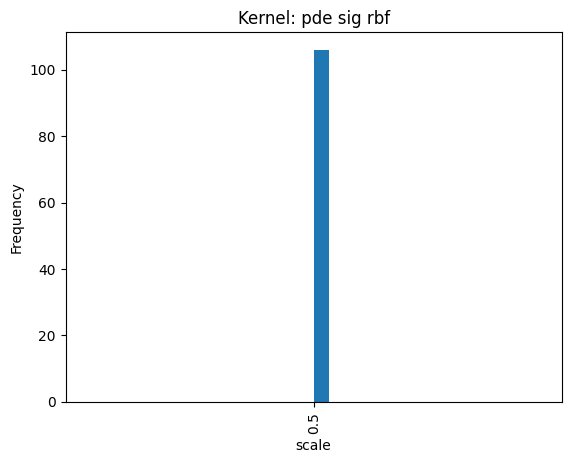

In [14]:
plot_cv_params_single_kernel(cv_results, "scale", "pde sig rbf")

# Run specific param_dict on specific dataset

In [ ]:
import torch
from typing import Dict
from tslearn.datasets import UCR_UEA_datasets
from experiments.experiment_code import run_all_kernels
import numpy as np
def run_specific_param_dict(
        dataset_name:str, 
        param_dict:Dict,
        verbose:bool = False,
        device="cuda",
    ):    
    """Runs the specific param_dict on a dataset.
    
    Args:
        dataset_name (str): Name of the dataset.
        param_dict (Dict): Dictionary of parameters.
        verbose (bool): Verbosity.
        device (str): Device for PyTorch computation.
        """
    X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(dataset_name)
    X_train = torch.from_numpy(X_train).to(device)
    X_test = torch.from_numpy(X_test).to(device)
    unique_labels = np.unique(y_train)
    kernel_name = param_dict["kernel_name"]

    #create kernelwise dict
    kernelwise_dict = {kernel_name: {label: param_dict for label in unique_labels}}

    results = run_all_kernels(X_train, y_train, X_test, y_test, 
                        unique_labels, kernelwise_dict, verbose)
    aucs = results[kernel_name]
    print("Conf ROCAUC\t", aucs[0,0])
    print("Conf PRAUC\t", aucs[0,1])
    print("Mah ROCAUC\t", aucs[1,0])
    print("Mah PRAUC\t", aucs[1,1])
    return results


# General Parameters
param_dict = {
    "alpha": 0.00000000001,
    "threshold": 5,
    "normalize": True,
    "time": "",
    "basepoint": "",
}


# Kernel Specific Parameters
param_dict["kernel_name"] = "gak"
param_dict["order"] = 5
param_dict["sigma"] = 1.4
param_dict["scale"] = 0.5
param_dict["gak_factor"] = 16
param_dict["dyadic_order"] = 3
param_dict["gamma"] = 0.9999999
param_dict["tau"] = 1/5.5/np.sqrt(10)


res = run_specific_param_dict("Epilepsy", param_dict, verbose=True)